# ZKM SOUNDSCAPE ANALYSIS

1) calculate ENERGY LEVELS


CALCULATE ENERGY LEVELS

FFT - SUM BINS - FAST

FFT - SUM BINS - SLOW

NORMALISE MAGNITUDE

CALCULATE dB TO ZERO

SHOW THE NUMBERS AS COLORS IN THE OCTAVES (SPECTRUM OCTAVE TO OCTAVE) PRESENCE OF HARMONICS

SUM is THE OVERALL ENERGY




In [15]:
from librosa import load
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import scipy as scipy
from scipy.signal import lfilter
import IPython.display as ipd
from math import pi  
from math import tan 
from math import pow 

In [24]:
# FFT - SUM BINS - FAST

# Takes audio signal filtered in dBA

def  magnitude(the_signal):

# the signal is a tuple with fs as second parameter
# call librosa
    
    the_complex_spectrum=librosa.core.stft(the_signal, n_fft=8192, hop_length=None, win_length=None, window='hann')

    the_magnitude =np.abs(the_complex_spectrum)

    return(the_magnitude)


def normalize(the_magnitude):
    
    N=8192
    the_norm_mag = the_magnitude/N*2

    return(the_norm_mag)

def store_in_dB(the_norm_mag):
    
    the_dB_mag_spectrum = librosa.amplitude_to_db(the_norm_mag, ref=0),sr=44100, y_axis='log',x_axis='frames')

    return(the_dB_mag_spectrum)


In [132]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

def sum_bin_energy(the_norm_mag):
    
    mag_sum=[]
    dB_sum=[]
    jlogf =[]
#     sample_frames=[]
    
    numOfFrames = the_norm_mag.shape[1]
    numOfBins = the_norm_mag.shape[0]

    hopSize = 2048
    samples = numOfFrames * hopSize

    sample_frames =np.linspace(0,samples,numOfFrames)

#     print(len(sample_frames))

    for frame_column in range(0, len(sample_frames)):
                   
    #     take one entire column of N bins
                   
        g = the_norm_mag[: , frame_column]
                   
    #     sum the amplitude in the bins and append it to the column array
                        
        mag_sum.append(np.sum(g))   
                        
    #     h.append(np.mean(g))
    #     now take one column, convert all of it to dB
#                               and store it in j (temporary)

        j = librosa.amplitude_to_db(g, ref=0)

    #     for every element in the column
    # reset jlog 
               
#         empty the array
                        
        jlogf = []

        for k in j:

    #         store in array the converted values
                        
            jlogf.append(pow(10,k/10))
                        
    # then sum in dB way the values and store the sum in the dB_sum array
                        
#         sumForWindow = 10*np.log10(sum(jlogf))                         
#         dB_sum.append(sumForWindow)
                              
        dB_sum.append(10*np.log10(sum(jlogf)))
        

 # convert the amplitude sum to dB
    dB_mag_sum = librosa.amplitude_to_db(mag_sum, ref=0)-25.5
#     arrays = [dB_sum, dB_mag_sum]
    
    plt.figure(figsize=(15, 6))

    fig, ax = plt.subplots(figsize=(15, 12))
    plt.axhline(y=np.mean(dB_sum), color='r')
#     plt.plot(s,dBArr, label=' sum Magnitude converted to dB (ref = 0) -25.5dB')
    plt.plot(sample_frames,dB_mag_sum, label=' sum Magnitude converted to dB (ref = 0) -25.5dB')
#     plt.plot(s,dBsum, label='dB Summed bin column in window')
#     plt.plot(s,dBArrf, label='FILTERED - sum Magnitude  converted to dB (ref = 0) -25.5dB')
    plt.plot(sample_frames,dB_sum, label='non FILTERED - dB Summed bin column in window')

    plt.legend()


    ax.xaxis.grid(True,'minor')
    ax.xaxis.set_minor_locator(MultipleLocator(44100))



    plt.title('Difference between sums')
    plt.xlabel('Samples')
    plt.ylabel('dB Sum')
    plt.grid(True, which='both')
    plt.axhline(y=85, color='b')
    plt.ylim((35, 90))

    plt.show()
    
#     return arrays
                              
                              
# print(arrays)  



    

In [138]:
import seaborn as sns
from numpy import sin, cos, pi

from cycler import cycler

def plot_spectrogram(the_file):
    
    n = 8
    theta = np.linspace(0, 2 * pi, n)

    x = cos(theta)
    y = sin(theta)


    plt.figure(figsize=(15, 30))

    fft_size = 8192
    sr=44100

    the_transform_mag = np.abs(librosa.core.stft(the_file, n_fft=8192, hop_length=None, win_length=None, window='hann'))
    librosa.display.specshow(librosa.amplitude_to_db(the_transform_mag,ref=-90),sr=44100, y_axis='log',x_axis='ms')

    plt.colorbar()

    # default_cycler = cycler('color', ['r', 'g', 'b', 'y']) \
    #                     + cycler('linestyle', ['-', '--', ':', '-.'])
    # # array of 12 subdivisions colour spectrum

    colors = sns.color_palette("husl", 12)

    custom_cycler = cycler('color', colors)

    # custom_cycler = cycler('color', [ colors[0], colors[1],colors[2], colors[3],colors[4], colors[5],colors[6], colors[7],colors[8], colors[9],colors[10], colors[11]]) 

    plt.rc('lines', linewidth=.25)
    plt.rc('axes', prop_cycle=custom_cycler)

    freq_spacing = sr/fft_size
    first_bin = freq_spacing/2

    j = np.linspace(0, 100, 10)
    freqs=[]

    for a in range (0,int(sr/2/freq_spacing)):    
        freqs.append(first_bin + freq_spacing*a)

    # levels = np.arange(0., 1., 0.025)
    # cmap = cm.get_cmap(name='Blues', lut=None)

    # print(sns.color_palette("husl", 8)[0])
    # with sns.color_palette("cubehelix", n):

    for e in freqs[0:1024]:

        x_values = np.linspace(0, 100, 10)
        y_values = np.full(len(x_values),e)
        plt.plot(x_values, y_values)    

    plt.show()

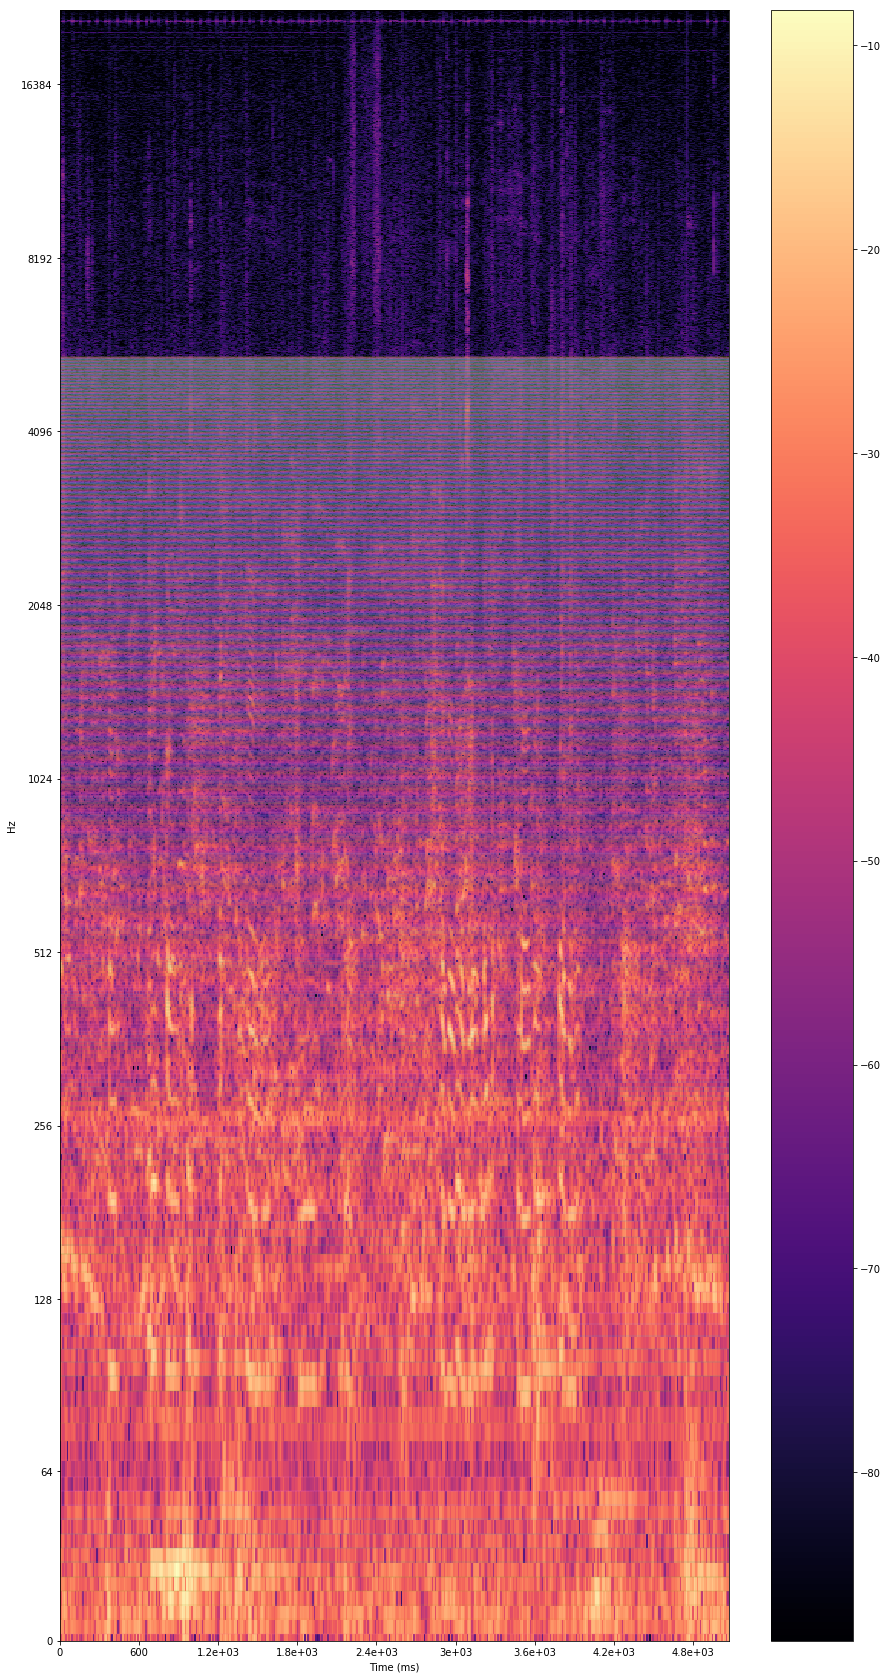

<Figure size 1080x432 with 0 Axes>

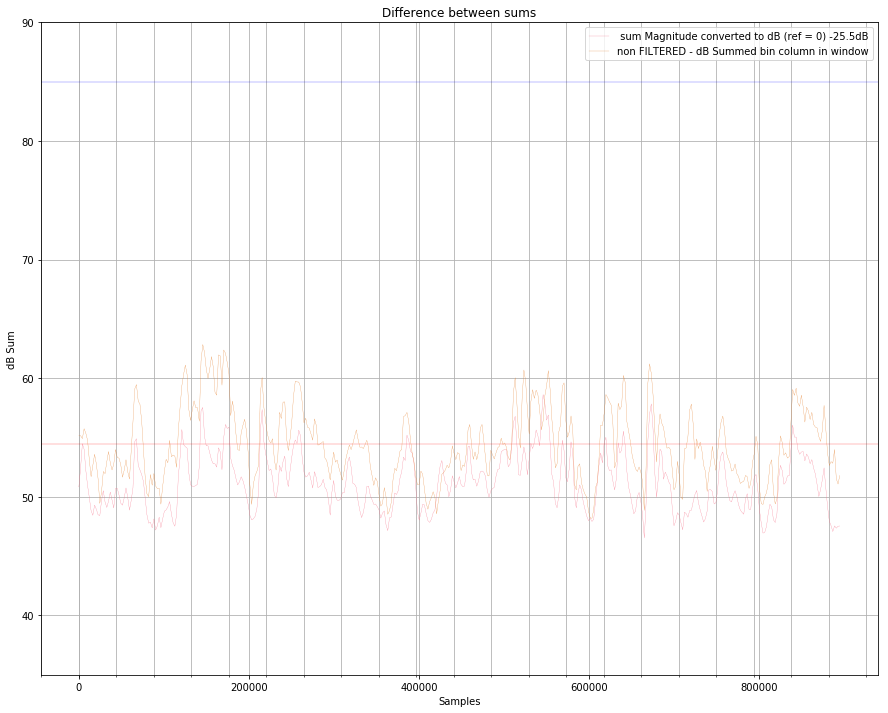

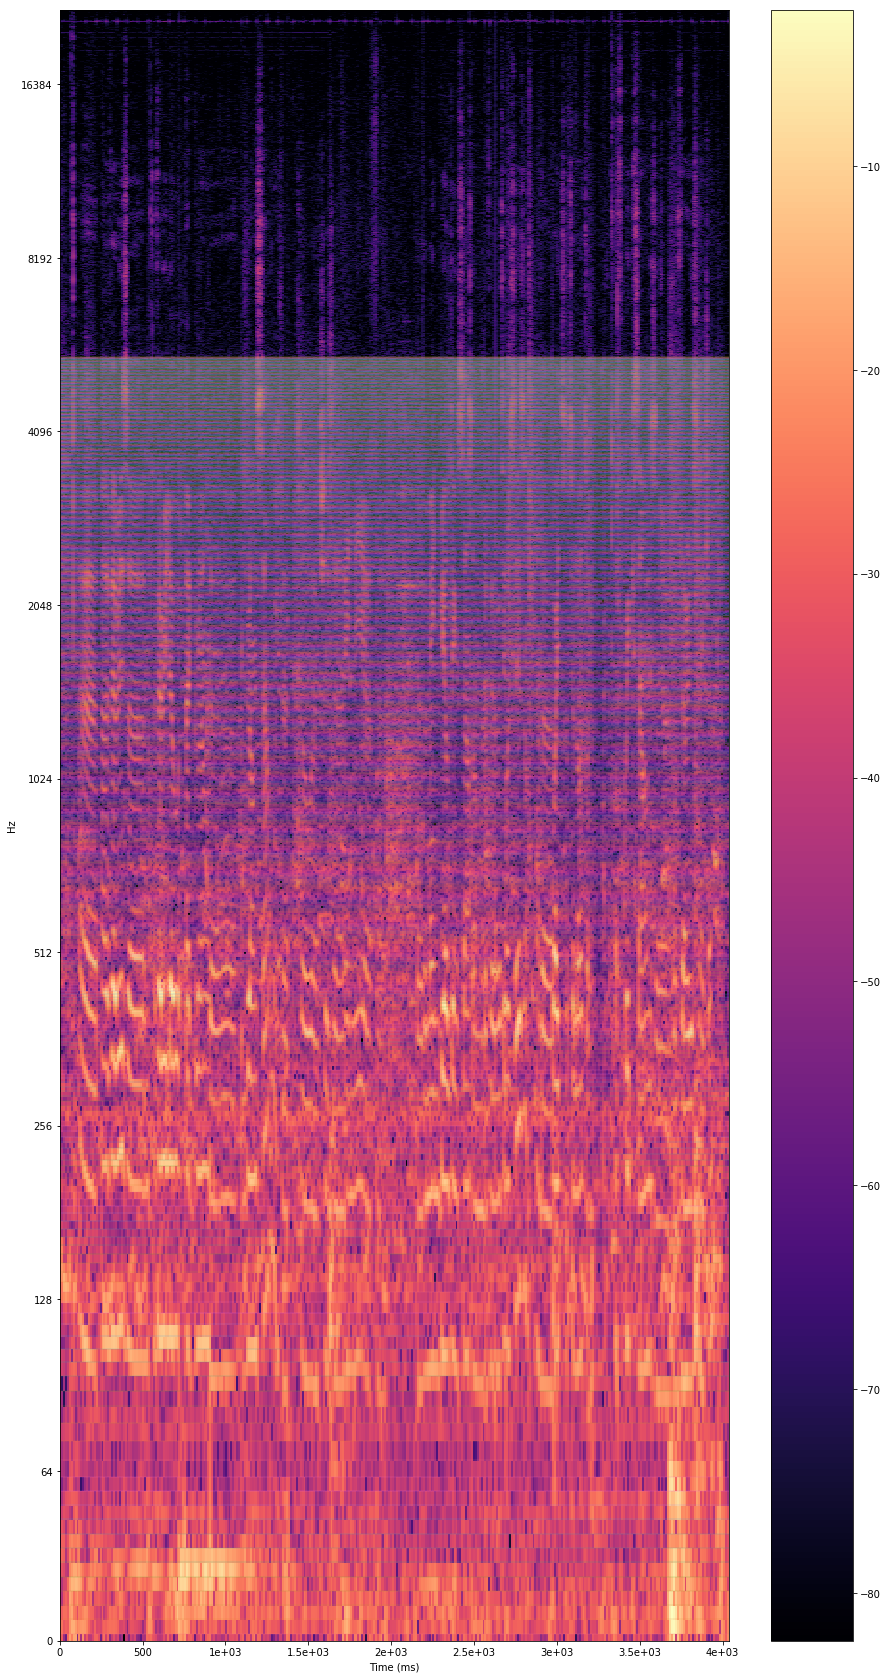

<Figure size 1080x432 with 0 Axes>

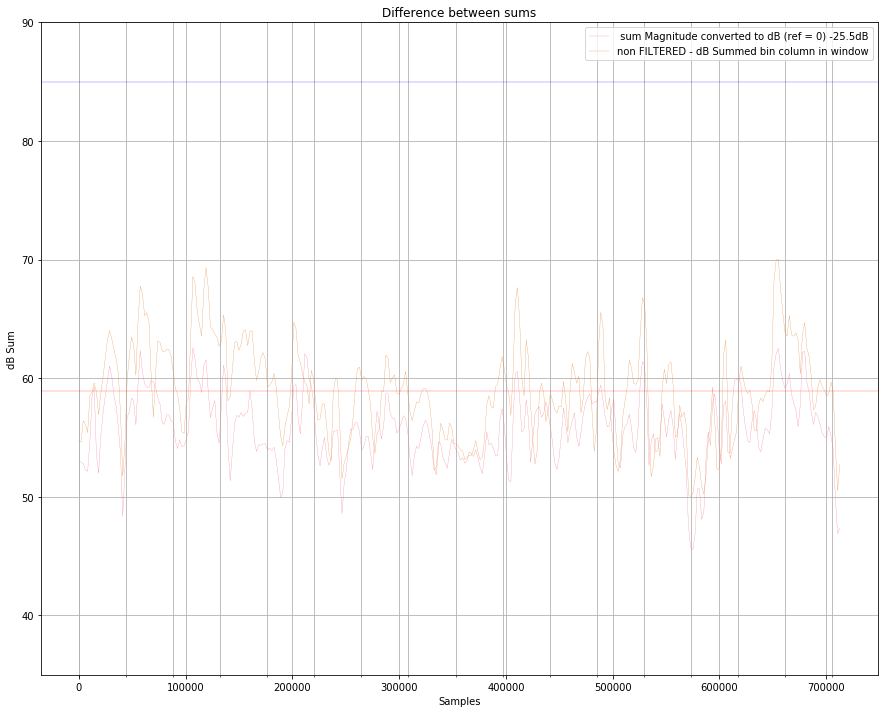

In [141]:
# CALCULATE ENERGY LEVELS

# THIS IS THE MAIN
# USAGE: assign file location to parameter
#     feed parameter to function
#     return table with results

# needs argument: the file

def CALC_EN_LEV(the_file):
    
    plot_spectrogram(the_file)
  
    return sum_bin_energy(normalize(magnitude(the_file)))


# this needs to be already filtered in dBA (see MATLAB code)
# mono_file, fs = load('/Users/amilo/Desktop/karl/calibration/MONO_85_dBA_SLOW_left.wav', sr=44100, mono=True)
mono_file, fs = load('/Users/amilo/Desktop/karl/p2a2_nonspeech_77.wav', sr=44100, mono=True)

mono_file_speech, fs = load('/Users/amilo/Desktop/karl/p2a2_speech_77.wav', sr=44100, mono=True)

CALC_EN_LEV(mono_file[0:1000000])
CALC_EN_LEV(mono_file_speech)

# print(CALC_EN_LEV(mono_file))